<ipython-input-9-f2ba81b70893>:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  machida_data['Hour'] = machida_data['Date/Time'].dt.hour


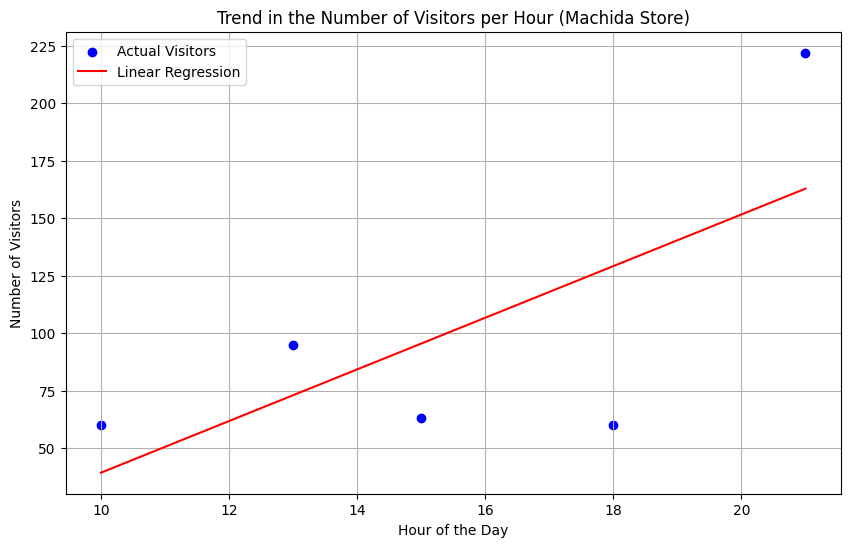

Intercept (b0): -72.9344262295082
Slope (b1): 11.229508196721312


In [ ]:
import random
import pandas as pd
from datetime import datetime, timedelta

# Store Information
stores = ["Shinjuku", "Machida", "Yokohama"]
store_hours = {"Shinjuku": (7, 20), "Machida": (10, 21), "Yokohama": (7, 20)}
peak_hours = {"Shinjuku": ["Morning", "Noon", "Evening"],
              "Machida": ["Noon", "Evening"],
              "Yokohama": ["Morning", "Noon", "Evening"]}
weekday_stores = ["Shinjuku", "Machida"]
closed_days = {"Shinjuku": ["Saturday", "Sunday"], "Machida": ["Thursday"]}

# Customer Information
age_groups = ["Children", "Youth", "Middle-aged", "Elderly"]
gender = ["Male", "Female"]
payment_methods = ["Cash", "Credit", "Debit"]

# Item Information
items = {"Tuna Mayo": 200, "Kelp": 180, "Salmon Roe": 420, "Chashu": 300, "Takana": 250}
item_popularity = {
    "Tuna Mayo": ["All"],
    "Kelp": ["Elderly"],
    "Salmon Roe": ["Female"],
    "Chashu": ["Male (20s-40s)"],
    "Takana": ["Elderly"]
}

# Initialize variables
transactions = []
transaction_id = 1

# Simulate one day's sales data
date = datetime(2023, 7, 24)
for _ in range(24):
    store = random.choice(stores)
    start_hour, end_hour = store_hours[store]
    hour = random.randint(start_hour, end_hour)
    date_time = date.replace(hour=hour, minute=0, second=0)

    if store in weekday_stores:
        day = date_time.strftime("%A")
        if day in closed_days[store]:
            continue

    if store == "Machida" and date_time.hour == 11:
        # Double customers due to kindergarten pick-up
        num_customers = random.randint(60, 120)
    else:
        num_customers = random.randint(20, 40)

    for _ in range(num_customers):
        age_group = random.choice(age_groups)
        if age_group == "Children":
            age = random.randint(1, 18)
        elif age_group == "Youth":
            age = random.randint(18, 35)
        elif age_group == "Middle-aged":
            age = random.randint(36, 55)
        else:
            age = random.randint(56, 100)

        gender_choice = random.choice(gender)
        payment_method = random.choice(payment_methods)
        purchased_items = random.sample(list(items.keys()), random.randint(1, 3))

        for item in purchased_items:
            unit_price = items[item]
            quantity = random.uniform(1, 3)
            subtotal = unit_price * quantity
            discount = 0

            if date_time.hour == end_hour - 1:
                # Apply one-hour-before-closing discount
                discount = 100
                subtotal -= discount

            transactions.append([transaction_id, date_time, day, store, gender_choice, age_group, item, unit_price, quantity, subtotal, payment_method])
            transaction_id += 1

# Create a DataFrame
df = pd.DataFrame(transactions, columns=["Transaction ID", "Date/Time", "Day", "Store", "Gender", "Age Group", "Items Purchased", "Unit Price", "Quantity", "Subtotal", "Payment Method"])

# Export to Excel
# df.to_excel("sales_data.xlsx", index=False)

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the sales data into a DataFrame (replace 'sales_data.xlsx' with the actual file path)
# df = pd.read_excel('sales_data.xlsx')

# Filter data for the Machida store
machida_data = df[df['Store'] == 'Machida']

# Convert the Date/Time column to hours
machida_data['Hour'] = machida_data['Date/Time'].dt.hour

# Group data by hour and calculate the total number of visitors
hourly_visitors = machida_data.groupby('Hour')['Transaction ID'].count().reset_index()

# Extract the hour and visitor count
X = hourly_visitors['Hour'].values.reshape(-1, 1)
y = hourly_visitors['Transaction ID'].values

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Predict visitors based on the model
y_pred = model.predict(X)

# Plot the original data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Actual Visitors', color='blue')
plt.plot(X, y_pred, label='Linear Regression', color='red')
plt.title('Trend in the Number of Visitors per Hour (Machida Store)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Visitors')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

# Print the regression coefficients
print(f'Intercept (b0): {model.intercept_}')
print(f'Slope (b1): {model.coef_[0]}')



Create sales POS data for a hypothetical retail store, taking into account the following conditions. However, please make sure that the code is not too long.

### Basic Information
- Shinjuku, Machida, and Yokohama stores.
- Business hours are usually from 7:00 to 20:00 for the regular stores.
- Average number of visitors per day is 100 at Shinjuku store, 30 at Machida store, and 60 at Yokohama store.
- Average number of items purchased per customer: 1.2 in the morning, 2.5 in the afternoon, and 2.8 in the evening
- Five items: tuna mayo (200 yen), kelp (180 yen), salmon roe (420 yen), chashu (300 yen), and takana (250 yen)
- A single customer purchases a total of one to three different items in different combinations. Rarely, some customers purchase more than one of the same item.

### output information
- The period is one week from Monday, July 24, 2023 to Sunday, July 30, 2023
- Data items should be "transaction ID, transaction ID, date/time, day of week, store, gender, age group, items purchased, unit price, quantity, subtotal, and payment method.
- Age groups should be categorized as "children (1-18 years old)," "youth (18-35 years old)," "middle-aged (36-55 years old)," and "elderly (56 years old and older).
- Payment methods should be "Cash", "Credit" or "Debit".
- Use English for the days of the week.
- Please output the created data in downloadable Excel format.
- Assign one transaction ID per customer to group purchases by the same customer. If a customer visits the store more than once, assign a new transaction ID.

### Store Characteristics Information
- Shinjuku store is an urban core store, Machida store is a large suburban store, and Yokohama store is a department store tenant
- Business hours are 7:00 - 20:00 for regular stores; 10:00 - 21:00 for department store tenants
- Peak demand is highest for lunch at noon, but demand for breakfast is also high for the urban center type stores, and demand for dinner is high for the suburban stores
- Urban stores have high sales on weekdays. Urban stores have high weekday sales, and are closed on weekends. Customers are mainly businessmen. Most customers are businessmen, with many men in the morning and young women in the afternoon.
- Suburban stores are closed on Thursdays. Weekend sales are high, with a trend toward bulk purchases of multiple items for families.
- Department store tenants are not closed. Department store tenants are not closed. Sales are higher on Fridays through Saturdays, and the customer base is older.

## Item characteristics information
- Tuna Mayo" is popular among all customers, "Kelp" and "Takana" are popular among older customers, "Salmon roe" is popular among women, and "Chashu" is popular among men in their 20s to 40s

Special Information
- One hour before closing, a sale is held in order not to leave any items unsold. All items can be purchased with a 100 yen discount. This is why the number of customers increases only during this time.
- There is a kindergarten nearby the Machida store, and every Wednesday, the number of customers doubles between 11:00 and 12:00 due to kindergarten students returning home from pick-up.

---------------------

This data is POS data for three stores selling rice balls. Create a Python script in scikit-learn to analyze the trend in the number of visitors per hour for the Machida store using linear regression analysis



次条件を考慮して、仮想的な小売店舗の売り上げPOSデータを作成してください。ただし、コードが長くなりすぎないように工夫してください。

＃＃＃基本情報
- 新宿店、町田店、横浜店の3店舗
- 営業時間は通常店舗は7:00～20:00。
- 1日の平均来客数は新宿店100人、町田店は30人、横浜店は60人
- 1人あたりの購入アイテム数の平均は、朝は1.2個、昼は2.5個、夕は2.8個
- アイテムは「ツナマヨ（200円）」「こんぶ（180円）」「いくら（420円）」「チャーシュー（300円）」「高菜（250円）」の5種類
- 一人の客は異なるアイテムを組み合わせて合計で1～3個を購入する。稀に同じアイテムを複数購入する人もいる。

＃＃＃出力情報
- 期間は2023年7月24日（月曜日）から7月30日（日曜日）までの1週間
- データの項目は「トランザクションID、取引ID、日時、曜日、店舗、性別、年齢層、購入アイテム、単価、個数、小計、支払方法」としてください。
- 年齢層は「子供（1-18歳）」、「若者（18-35歳）」、「中高年（36-55歳）」、「高齢者（56歳以上）」に分類してください。
- 支払方法は「現金」、「クレジット」、「デビット」のいずれかにします。
- 曜日は英語を使ってください
- 作成したデータはExcel形式でダウンロード可能な状態で出力してください。
- 同じ顧客による購入をグループ化するために1人の顧客につき1つの取引IDを割り当てます。顧客が複数回来店する場合は、新たな取引IDを割り当ててください。

＃＃＃店舗特性情報
- 新宿店は都心型基幹店舗、町田店は郊外型大型店舗、横浜店は百貨店テナント
- 営業時間は通常店舗は7:00～20:00。百貨店テナントは10:00～21:00
- ピークは昼のランチ需要が最も高いが、都心型は朝食需要も高い、郊外店舗は夕食需要が高い
- 都心型は平日の売上が高い。土日は休業。客層はサラリーマン中心。朝は男性が多く、昼は若い女性が多い
- 郊外型は木曜休業。週末の売り上げが多く、家族向けに複数アイテムをまとめ買いする傾向がある
- 百貨店テナントは休業なし。金曜から土曜の売上が多く、客層は高齢層

＃＃＃アイテム特性情報
- アイテムは「ツナマヨ」は万人受け、「こんぶ」「高菜」は高い年齢層に人気、「いくら」は女性に人気、「チャーシュー」は20～40代の男性に人気

＃＃＃特別情報
- 閉店1時間前は売り残しをしたくないためセールを実施。全アイテム100円引きで購入できる。このため、この時間のみ客数が増える
- 町田店の近くには幼稚園があり毎週水曜日は幼稚園のお迎え帰りのため、11:00～12:00の間のみ若者女性と子供の来客数が倍増する。



このデータは、おにぎりを販売する3つの店舗のPOSデータです。町田店の時間あたりの来客数の傾向を線形回帰分析で分析するためにPythonスクリプトをscikit-learnで作成してください